In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dados_tratados.csv')

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [30]:
df.drop(columns=['customerID'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   object 
 4   customer.Dependents        7267 non-null   object 
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   object 
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

In [31]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_yes,customer.gender_male,customer.Partner_yes,customer.Dependents_yes,phone.PhoneService_yes,phone.MultipleLines_no phone service,...,internet.StreamingTV_no internet service,internet.StreamingTV_yes,internet.StreamingMovies_no internet service,internet.StreamingMovies_yes,account.Contract_one year,account.Contract_two year,account.PaperlessBilling_yes,account.PaymentMethod_credit card (automatic),account.PaymentMethod_electronic check,account.PaymentMethod_mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [32]:
print(df_encoded.columns)

Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Churn_yes', 'customer.gender_male',
       'customer.Partner_yes', 'customer.Dependents_yes',
       'phone.PhoneService_yes', 'phone.MultipleLines_no phone service',
       'phone.MultipleLines_yes', 'internet.InternetService_fiber optic',
       'internet.InternetService_no',
       'internet.OnlineSecurity_no internet service',
       'internet.OnlineSecurity_yes',
       'internet.OnlineBackup_no internet service',
       'internet.OnlineBackup_yes',
       'internet.DeviceProtection_no internet service',
       'internet.DeviceProtection_yes',
       'internet.TechSupport_no internet service', 'internet.TechSupport_yes',
       'internet.StreamingTV_no internet service', 'internet.StreamingTV_yes',
       'internet.StreamingMovies_no internet service',
       'internet.StreamingMovies_yes', 'account.Contract_one year',
       'account.Contract_two year', 'account.Paperle

In [33]:
print("Verificando valores ausentes:")
print(df_encoded.isnull().sum())

df_encoded.fillna(df_encoded.mean(numeric_only=True), inplace=True)

evasao_rate = df_encoded['Churn_yes'].value_counts(normalize=True)
print("Proporção de evasão:")
print(evasao_rate)

X = df_encoded.drop('Churn_yes', axis=1)
y = df_encoded['Churn_yes']

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Dados balanceados com SMOTE:")
print("Nova distribuição de classes:")
print(pd.Series(y_resampled).value_counts(normalize=True))

Verificando valores ausentes:
customer.SeniorCitizen                            0
customer.tenure                                   0
account.Charges.Monthly                           0
account.Charges.Total                            11
Churn_yes                                         0
customer.gender_male                              0
customer.Partner_yes                              0
customer.Dependents_yes                           0
phone.PhoneService_yes                            0
phone.MultipleLines_no phone service              0
phone.MultipleLines_yes                           0
internet.InternetService_fiber optic              0
internet.InternetService_no                       0
internet.OnlineSecurity_no internet service       0
internet.OnlineSecurity_yes                       0
internet.OnlineBackup_no internet service         0
internet.OnlineBackup_yes                         0
internet.DeviceProtection_no internet service     0
internet.DeviceProtection_yes     

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

Correlação e Seleção de Variávei

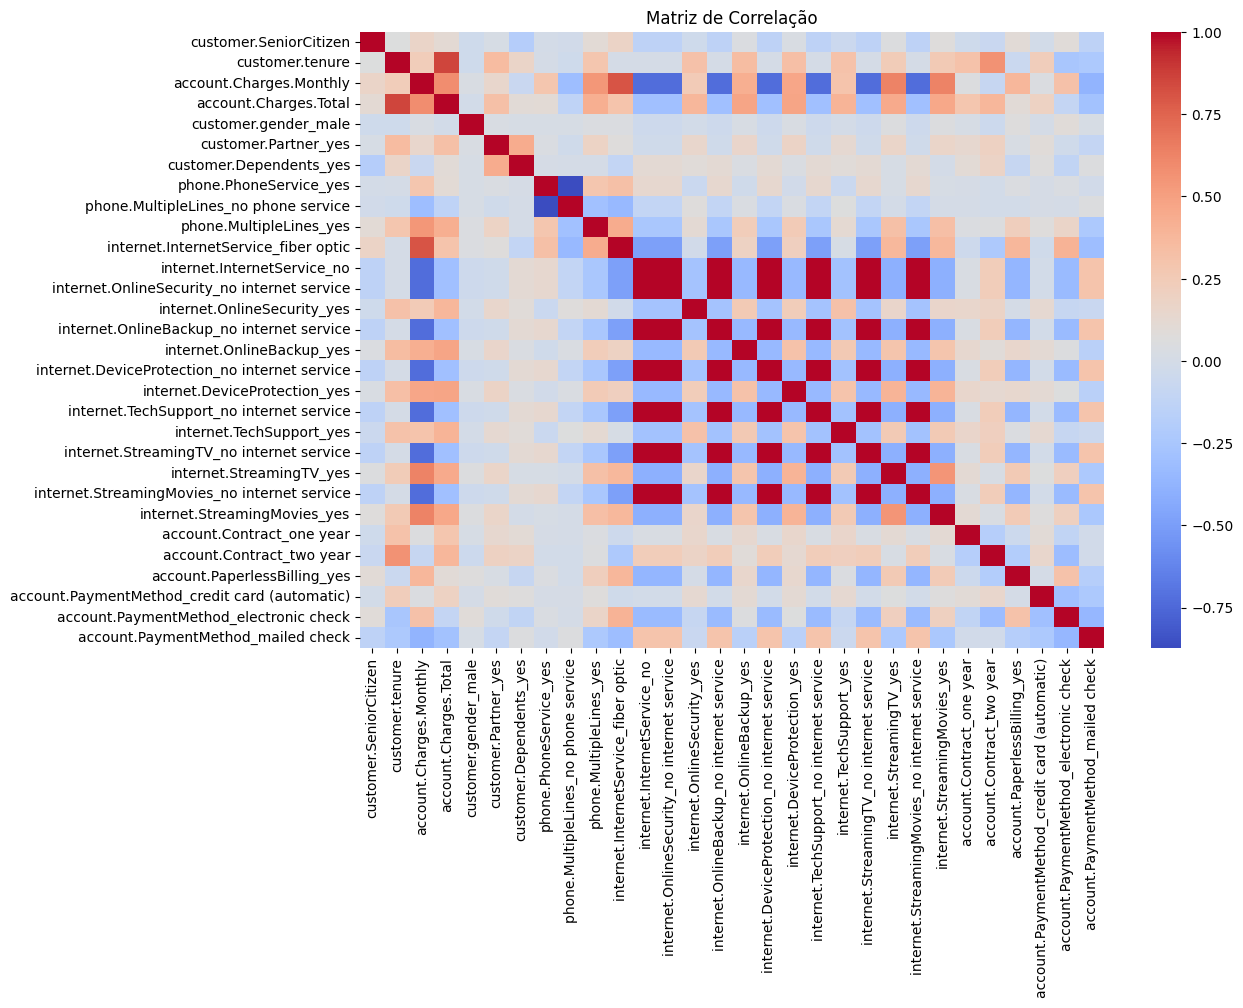

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_resampled).corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação")
plt.show()

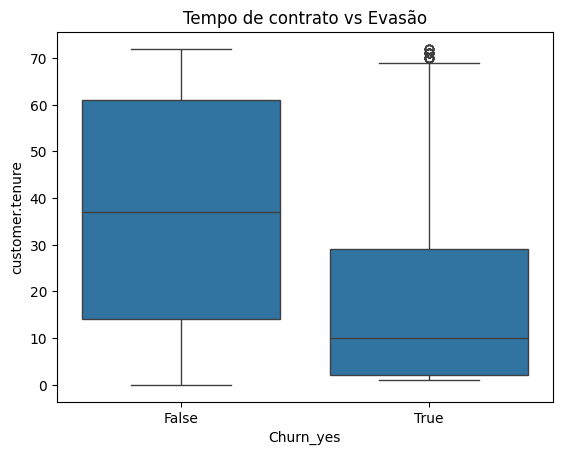

In [36]:
sns.boxplot(x=y_resampled, y=X_resampled['customer.tenure'])
plt.title("Tempo de contrato vs Evasão")
plt.show()

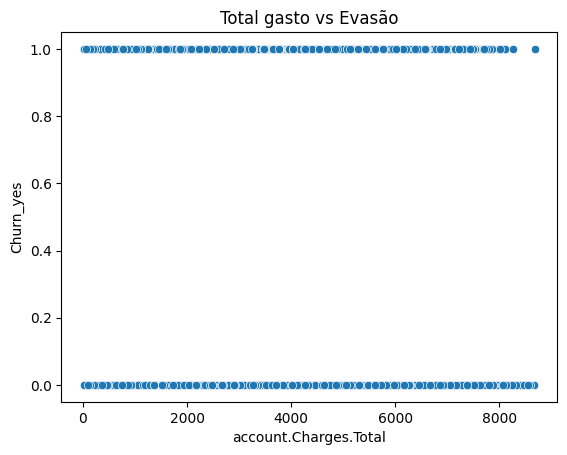

In [37]:
sns.scatterplot(x=X_resampled['account.Charges.Total'], y=y_resampled)
plt.title("Total gasto vs Evasão")
plt.show()

Modelagem Preditiva

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Avaliação dos modelos

In [41]:
def avaliar_modelo(y_true, y_pred, nome_modelo):
    print(f"🔍 Avaliação do modelo: {nome_modelo}")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Precisão:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_true, y_pred))
    print("\n")

avaliar_modelo(y_test, y_pred_log, "Regressão Logística")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")

🔍 Avaliação do modelo: Regressão Logística
Acurácia: 0.8314294535350417
Precisão: 0.8415164698570541
Recall: 0.8231003039513678
F1-score: 0.8322065150583897
Matriz de Confusão:
 [[1339  255]
 [ 291 1354]]


🔍 Avaliação do modelo: Random Forest
Acurácia: 0.8425439950602037
Precisão: 0.8470948012232415
Recall: 0.8419452887537994
F1-score: 0.8445121951219512
Matriz de Confusão:
 [[1344  250]
 [ 260 1385]]




Interpretação e Conclusões

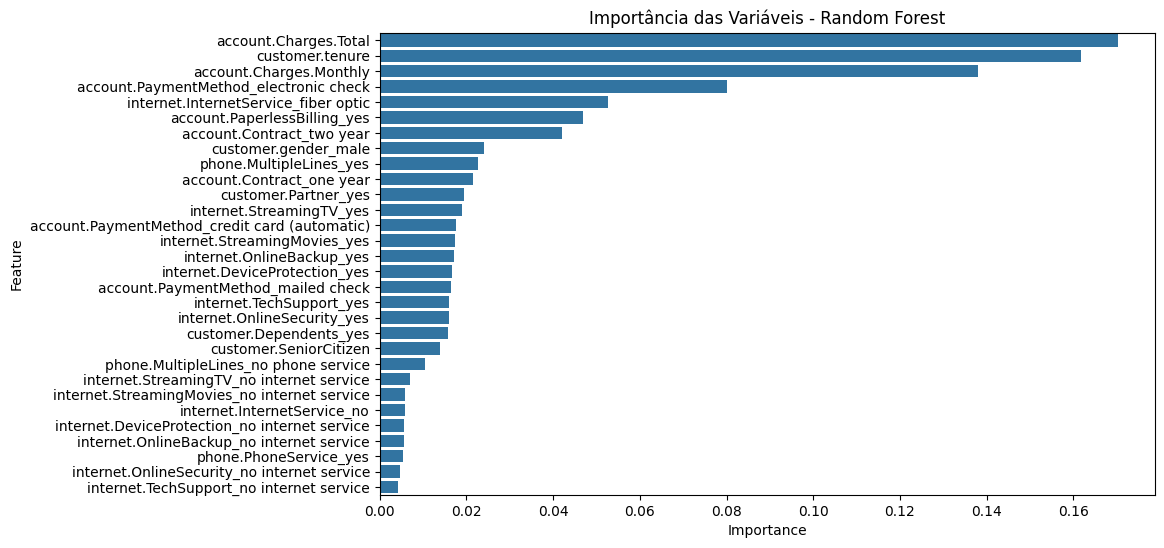

In [42]:
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Importância das Variáveis - Random Forest")
plt.show()

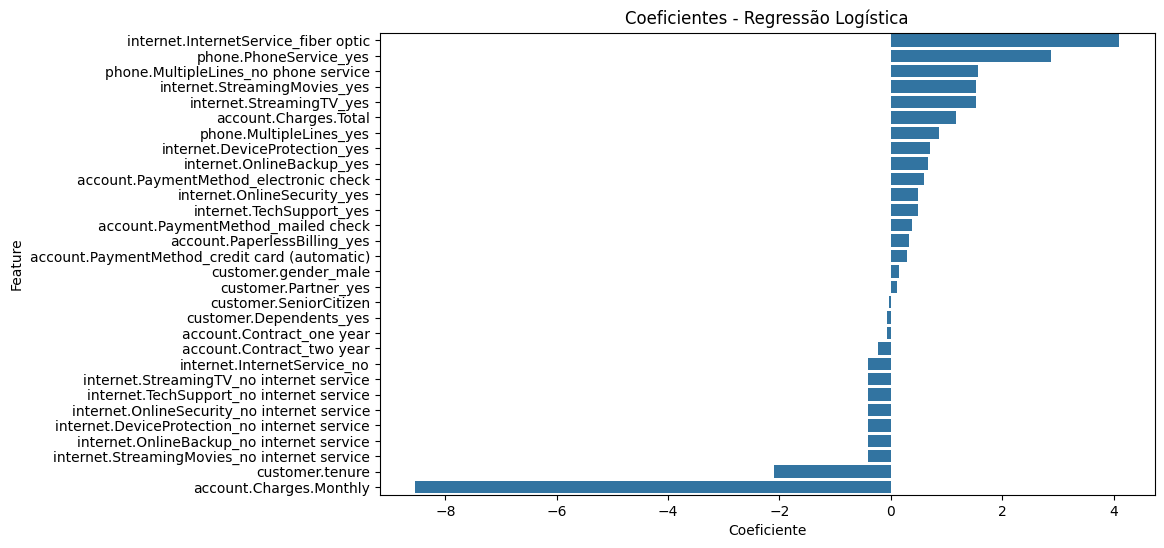

In [43]:
coef_df = pd.DataFrame({'Feature': features, 'Coeficiente': log_model.coef_[0]})
coef_df.sort_values(by='Coeficiente', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Feature', data=coef_df)
plt.title("Coeficientes - Regressão Logística")
plt.show()

Conclusão final

print("Com base nos modelos aplicados, identificamos que variáveis como 'TotalCharges', 'tenure' e 'Contract_Two year' têm forte influência na evasão.")
print("O modelo Random Forest teve melhor desempenho geral, sem necessidade de normalização.")
print("A Regressão Logística também apresentou bons resultados, com coeficientes que ajudam na interpretação.")
print("Recomenda-se estratégias de retenção focadas em clientes com contratos curtos e baixo tempo de permanência.")